In [1]:
import pandas as pd
import numpy as np

df = pd.read_excel('Çalışma Çizelgesi v2.xlsx')
df.head()

,Gün,Ay,Yıl,GünAdı,Yapılan,Hedef,ÇalışmaOranı,FreeDay,OffDay
0,5,12,2022,Pazartesi,5,6,0.833333,0,0
1,6,12,2022,Salı,3,6,0.500000,0,0
2,7,12,2022,Çarşamba,0,0,0.000000,0,1
3,8,12,2022,Perşembe,0,6,0.000000,0,0
4,9,12,2022,Cuma,0,6,0.000000,0,0


#### GÜNLÜK ANALİZ

In [2]:
df['ÇalışmaOranı'] = np.round( ( df['ÇalışmaOranı'] * 100 ) , 1 )
df.head()

,Gün,Ay,Yıl,GünAdı,Yapılan,Hedef,ÇalışmaOranı,FreeDay,OffDay
0,5,12,2022,Pazartesi,5,6,83.3,0,0
1,6,12,2022,Salı,3,6,50.0,0,0
2,7,12,2022,Çarşamba,0,0,0.0,0,1
3,8,12,2022,Perşembe,0,6,0.0,0,0
4,9,12,2022,Cuma,0,6,0.0,0,0


In [3]:
df['Yapilmayan'] = [ 1 if a > 0 and b == 0 else 0 for a,b in zip(df['Hedef'] , df['Yapılan'])]
df.head()

,Gün,Ay,Yıl,GünAdı,Yapılan,Hedef,ÇalışmaOranı,FreeDay,OffDay,Yapilmayan
0,5,12,2022,Pazartesi,5,6,83.3,0,0,0
1,6,12,2022,Salı,3,6,50.0,0,0,0
2,7,12,2022,Çarşamba,0,0,0.0,0,1,0
3,8,12,2022,Perşembe,0,6,0.0,0,0,1
4,9,12,2022,Cuma,0,6,0.0,0,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031 entries, 0 to 1030
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Gün           1031 non-null   int64  
 1   Ay            1031 non-null   int64  
 2   Yıl           1031 non-null   int64  
 3   GünAdı        1031 non-null   object 
 4   Yapılan       1031 non-null   int64  
 5   Hedef         1031 non-null   int64  
 6   ÇalışmaOranı  1031 non-null   float64
 7   FreeDay       1031 non-null   int64  
 8   OffDay        1031 non-null   int64  
 9   Yapilmayan    1031 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 80.7+ KB


In [5]:
df['Tarih'] = pd.to_datetime(df['Yıl'].astype(str) + '-' + df['Ay'].astype(str) + '-' + df['Gün'].astype(str))
df['Tarih'] = df['Tarih'].dt.strftime('%d-%m-%Y')
df.drop(columns=['Gün', 'Ay','Yıl'], inplace=True)
df = df[['Tarih', 'GünAdı', 'Yapılan', 'Hedef', 'ÇalışmaOranı', 'FreeDay', 'OffDay', 'Yapilmayan']]
df.head()

,Tarih,GünAdı,Yapılan,Hedef,ÇalışmaOranı,FreeDay,OffDay,Yapilmayan
0,05-12-2022,Pazartesi,5,6,83.3,0,0,0
1,06-12-2022,Salı,3,6,50.0,0,0,0
2,07-12-2022,Çarşamba,0,0,0.0,0,1,0
3,08-12-2022,Perşembe,0,6,0.0,0,0,1
4,09-12-2022,Cuma,0,6,0.0,0,0,1


In [6]:
day_count = df['GünAdı'].value_counts().reset_index()
day_count.columns = ['GünAdı', 'GünSayı']
day_count

,GünAdı,GünSayı
0,Pazartesi,148
1,Salı,148
2,Çarşamba,147
3,Perşembe,147
4,Cuma,147
5,Cumartesi,147
6,Pazar,147


In [7]:
toplam_calisma = df.groupby('GünAdı')[['Yapılan','Hedef', 'FreeDay', 'OffDay', 'Yapilmayan']].sum().reindex(['Pazartesi', 'Salı', 'Çarşamba', 'Perşembe', 'Cuma', 'Cumartesi', 'Pazar']).reset_index()
toplam_calisma['Çalışma %'] = np.round( ((toplam_calisma['Yapılan'] / toplam_calisma['Hedef']) * 100) ,1) 
toplam_calisma['BoşGünler'] = toplam_calisma['FreeDay'] + toplam_calisma['OffDay'] + toplam_calisma['Yapilmayan']
toplam_calisma = toplam_calisma[['GünAdı', 'Yapılan', 'Hedef', 'Çalışma %', 'FreeDay', 'OffDay', 'Yapilmayan', 'BoşGünler']]
toplam_calisma['Boş %'] = np.round( ((toplam_calisma['BoşGünler'] / df.shape[0]) * 100) ,1) 

In [8]:
toplam_calisma = toplam_calisma.merge(day_count, on='GünAdı', how='left')
toplam_calisma

,GünAdı,Yapılan,Hedef,Çalışma %,FreeDay,OffDay,Yapilmayan,BoşGünler,Boş %,GünSayı
0,Pazartesi,673,1192,56.5,2,10,6,18,1.7,148
1,Salı,530,1122,47.2,3,13,7,23,2.2,148
2,Çarşamba,513,1128,45.5,2,18,10,30,2.9,147
3,Perşembe,478,1040,46.0,2,24,9,35,3.4,147
4,Cuma,389,984,39.5,3,31,19,53,5.1,147
5,Cumartesi,94,194,48.5,99,14,4,117,11.3,147
6,Pazar,74,197,37.6,103,13,7,123,11.9,147


In [9]:
df.shape

(1031, 8)

In [10]:
ortalama_gunluk = toplam_calisma = df.groupby('GünAdı')[['Yapılan','Hedef', 'FreeDay', 'OffDay', 'Yapilmayan']].mean().reindex(['Pazartesi', 'Salı', 'Çarşamba', 'Perşembe', 'Cuma', 'Cumartesi', 'Pazar']).reset_index()
ortalama_gunluk['Çalışma %'] = np.round( ((ortalama_gunluk['Yapılan'] / ortalama_gunluk['Hedef']) * 100) ,1) 
ortalama_gunluk = ortalama_gunluk.round(1)
ortalama_gunluk

,GünAdı,Yapılan,Hedef,FreeDay,OffDay,Yapilmayan,Çalışma %
0,Pazartesi,4.5,8.1,0.0,0.1,0.0,56.5
1,Salı,3.6,7.6,0.0,0.1,0.0,47.2
2,Çarşamba,3.5,7.7,0.0,0.1,0.1,45.5
3,Perşembe,3.3,7.1,0.0,0.2,0.1,46.0
4,Cuma,2.6,6.7,0.0,0.2,0.1,39.5
5,Cumartesi,0.6,1.3,0.7,0.1,0.0,48.5
6,Pazar,0.5,1.3,0.7,0.1,0.0,37.6


In [11]:
df.shape

(1031, 8)

TOPLAM ÇALIŞMALAR

In [12]:
df_all = df.agg({'Yapılan': 'sum', 'Hedef': 'sum', 'FreeDay': 'sum', 'OffDay': 'sum', 'Yapilmayan': 'sum'})
df_all['Çalışma %'] = np.round((df_all['Yapılan'] / df_all['Hedef'])*100,1)
yapilmayan_toplam = df_all['FreeDay'] + df_all['OffDay'] + df_all['Yapilmayan']
df_all['BoşToplam'] = yapilmayan_toplam
df_all['Boş %'] = np.round((yapilmayan_toplam / df.shape[0])*100,1)
df_all

Yapılan       2751.0
Hedef         5857.0
FreeDay        214.0
OffDay         123.0
Yapilmayan      62.0
Çalışma %       47.0
BoşToplam      399.0
Boş %           38.7
dtype: float64

In [13]:
df_ort = df.agg({'Yapılan': 'mean', 'Hedef': 'mean', 'FreeDay': 'mean', 'OffDay': 'mean', 'Yapilmayan': 'mean'})
df_ort

Yapılan       2.668283
Hedef         5.680892
FreeDay       0.207565
OffDay        0.119302
Yapilmayan    0.060136
dtype: float64

#### AYLIK ANALİZ

In [14]:
df['Tarih'] = pd.to_datetime(df['Tarih'], format='%d-%m-%Y')
aylik_toplam = df.groupby(df['Tarih'].dt.to_period("M")).agg({'Yapılan': 'sum', 'Hedef': 'sum', 'FreeDay': 'sum', 'OffDay': 'sum', 'Yapilmayan': 'sum'}).reset_index()
aylik_toplam['Gün'] = df.groupby(df['Tarih'].dt.to_period("M")).size().values

aylik_toplam['ÇalışmaOranı'] = aylik_toplam['Yapılan'] / aylik_toplam['Hedef'] 
aylik_toplam['ÇalışmaOranı'] = np.round(aylik_toplam['ÇalışmaOranı'], 3) * 100

aylik_toplam['BoşGünler'] = aylik_toplam['FreeDay'] + aylik_toplam['OffDay'] + aylik_toplam['Yapilmayan']

aylik_toplam['Boş %'] = np.round((aylik_toplam['BoşGünler']/aylik_toplam['Gün'])*100 , 1)

aylik_toplam= aylik_toplam[['Tarih','Gün','Yapılan', 'Hedef', 'ÇalışmaOranı','FreeDay','OffDay', 'Yapilmayan', 'BoşGünler','Boş %']]
aylik_toplam

,Tarih,Gün,Yapılan,Hedef,ÇalışmaOranı,FreeDay,OffDay,Yapilmayan,BoşGünler,Boş %
0,2022-12,27,59,124,47.6,0,4,6,10,37.0
1,2023-01,31,101,148,68.2,7,2,1,10,32.3
2,2023-02,28,43,76,56.6,6,13,2,21,75.0
3,2023-03,31,107,172,62.2,7,3,1,11,35.5
4,2023-04,30,76,178,42.7,5,5,4,14,46.7
5,2023-05,31,116,224,51.8,5,2,0,7,22.6
6,2023-06,30,127,216,58.8,0,8,0,8,26.7
7,2023-07,31,34,88,38.6,1,7,9,17,54.8
8,2023-08,31,9,50,18.0,2,16,9,27,87.1
9,2023-09,30,18,44,40.9,5,14,2,21,70.0


In [15]:
aylik_ort = df.groupby(df['Tarih'].dt.to_period("M")).agg({'Yapılan': 'mean', 'Hedef': 'mean', 'FreeDay': 'mean', 'OffDay': 'mean', 'Yapilmayan': 'mean'}).reset_index()
aylik_ort['BoşGünler'] = aylik_ort['FreeDay'] + aylik_ort['OffDay'] + aylik_ort['Yapilmayan']
aylik_ort = aylik_ort.round(1)
aylik_ort

,Tarih,Yapılan,Hedef,FreeDay,OffDay,Yapilmayan,BoşGünler
0,2022-12,2.2,4.6,0.0,0.1,0.2,0.4
1,2023-01,3.3,4.8,0.2,0.1,0.0,0.3
2,2023-02,1.5,2.7,0.2,0.5,0.1,0.8
3,2023-03,3.5,5.5,0.2,0.1,0.0,0.4
4,2023-04,2.5,5.9,0.2,0.2,0.1,0.5
5,2023-05,3.7,7.2,0.2,0.1,0.0,0.2
6,2023-06,4.2,7.2,0.0,0.3,0.0,0.3
7,2023-07,1.1,2.8,0.0,0.2,0.3,0.5
8,2023-08,0.3,1.6,0.1,0.5,0.3,0.9
9,2023-09,0.6,1.5,0.2,0.5,0.1,0.7


#### HAFTALIK

In [16]:
df['Week'] = 0
add = 1
for i in range(0, len(df),7):
    df.loc[i:i+6, 'Week'] = add
    add += 1

df.head(15)

,Tarih,GünAdı,Yapılan,Hedef,ÇalışmaOranı,FreeDay,OffDay,Yapilmayan,Week
0,2022-12-05,Pazartesi,5,6,83.3,0,0,0,1
1,2022-12-06,Salı,3,6,50.0,0,0,0,1
2,2022-12-07,Çarşamba,0,0,0.0,0,1,0,1
3,2022-12-08,Perşembe,0,6,0.0,0,0,1,1
4,2022-12-09,Cuma,0,6,0.0,0,0,1,1
5,2022-12-10,Cumartesi,0,6,0.0,0,0,1,1
6,2022-12-11,Pazar,0,6,0.0,0,0,1,1
7,2022-12-12,Pazartesi,2,6,33.3,0,0,0,2
8,2022-12-13,Salı,2,6,33.3,0,0,0,2
9,2022-12-14,Çarşamba,4,6,66.7,0,0,0,2


In [17]:
haftalik_toplam = df.groupby(df['Week']).sum({'Yapılan': 'sum', 'Hedef': 'sum', 'FreeDay': 'sum', 'OffDay': 'sum', 'Yapilmayan': 'sum'})
haftalik_toplam['ÇalışmaOranı'] = (haftalik_toplam['Yapılan'] / haftalik_toplam['Hedef']*100).round(1)
haftalik_toplam.tail(10)

,Yapılan,Hedef,ÇalışmaOranı,FreeDay,OffDay,Yapilmayan
Week,,,,,,
139,27,58,46.6,0,0,0
140,21,54,38.9,0,0,2
141,22,46,47.8,1,0,0
142,18,50,36.0,2,0,1
143,8,20,40.0,2,3,0
144,23,50,46.0,0,0,0
145,17,44,38.6,2,0,0
146,11,38,28.9,2,0,1
147,15,44,34.1,2,0,0


In [18]:
df[df['Week']==10]

,Tarih,GünAdı,Yapılan,Hedef,ÇalışmaOranı,FreeDay,OffDay,Yapilmayan,Week
63,2023-02-06,Pazartesi,0,0,0.0,0,1,0,10
64,2023-02-07,Salı,0,0,0.0,0,1,0,10
65,2023-02-08,Çarşamba,0,0,0.0,0,1,0,10
66,2023-02-09,Perşembe,0,0,0.0,0,1,0,10
67,2023-02-10,Cuma,0,0,0.0,0,1,0,10
68,2023-02-11,Cumartesi,0,0,0.0,0,1,0,10
69,2023-02-12,Pazar,0,0,0.0,0,1,0,10


#### Örnek Sorgular

In [19]:
#Hedef 5 ten fazla belirlenmiş VE Çalışma Oranı %100 ve üzerinde olan kayıtları bul
df.loc[(df['Hedef']>5) & (df['ÇalışmaOranı']>=100)]

,Tarih,GünAdı,Yapılan,Hedef,ÇalışmaOranı,FreeDay,OffDay,Yapilmayan,Week
15,2022-12-20,Salı,6,6,100.0,0,0,0,3
29,2023-01-03,Salı,6,6,100.0,0,0,0,5
31,2023-01-05,Perşembe,7,6,116.7,0,0,0,5
36,2023-01-10,Salı,8,8,100.0,0,0,0,6
77,2023-02-20,Pazartesi,9,8,112.5,0,0,0,12
88,2023-03-03,Cuma,8,8,100.0,0,0,0,13
133,2023-04-17,Pazartesi,8,8,100.0,0,0,0,20
161,2023-05-15,Pazartesi,8,8,100.0,0,0,0,24
191,2023-06-14,Çarşamba,9,8,112.5,0,0,0,28
308,2023-10-09,Pazartesi,7,6,116.7,0,0,0,45


In [20]:
#Hedef 8 ve daha fazla belirlenmiş VE hiç çalışma yapılmamış kayıtları bul
df.loc[(df['Hedef']>=8) & (df['Yapilmayan']!=0)]

,Tarih,GünAdı,Yapılan,Hedef,ÇalışmaOranı,FreeDay,OffDay,Yapilmayan,Week
58,2023-02-01,Çarşamba,0,8,0.0,0,0,1,9
130,2023-04-14,Cuma,0,12,0.0,0,0,1,19
135,2023-04-19,Çarşamba,0,8,0.0,0,0,1,20
143,2023-04-27,Perşembe,0,12,0.0,0,0,1,21
337,2023-11-07,Salı,0,8,0.0,0,0,1,49
388,2023-12-28,Perşembe,0,8,0.0,0,0,1,56
415,2024-01-24,Çarşamba,0,8,0.0,0,0,1,60
428,2024-02-06,Salı,0,8,0.0,0,0,1,62
431,2024-02-09,Cuma,0,8,0.0,0,0,1,62
536,2024-05-24,Cuma,0,8,0.0,0,0,1,77


In [21]:
#2024 yılı içinde yapılmayan kayıtları bul
df.loc[(df['Tarih']>='2024-01-01') & (df['Yapilmayan']!=0)]

,Tarih,GünAdı,Yapılan,Hedef,ÇalışmaOranı,FreeDay,OffDay,Yapilmayan,Week
396,2024-01-05,Cuma,0,6,0.0,0,0,1,57
415,2024-01-24,Çarşamba,0,8,0.0,0,0,1,60
428,2024-02-06,Salı,0,8,0.0,0,0,1,62
431,2024-02-09,Cuma,0,8,0.0,0,0,1,62
511,2024-04-29,Pazartesi,0,2,0.0,0,0,1,74
536,2024-05-24,Cuma,0,8,0.0,0,0,1,77
666,2024-10-01,Salı,0,10,0.0,0,0,1,96
676,2024-10-11,Cuma,0,12,0.0,0,0,1,97
728,2024-12-02,Pazartesi,0,6,0.0,0,0,1,105
738,2024-12-12,Perşembe,0,12,0.0,0,0,1,106


#### 2024 öncesi ve 2024 analizleri [ Y I L L I K ]

In [22]:
df2024 = df.loc[(df['Tarih']>='2024-01-01')]
df2024.head()

,Tarih,GünAdı,Yapılan,Hedef,ÇalışmaOranı,FreeDay,OffDay,Yapilmayan,Week
392,2024-01-01,Pazartesi,4,4,100.0,0,0,0,57
393,2024-01-02,Salı,6,8,75.0,0,0,0,57
394,2024-01-03,Çarşamba,2,8,25.0,0,0,0,57
395,2024-01-04,Perşembe,6,8,75.0,0,0,0,57
396,2024-01-05,Cuma,0,6,0.0,0,0,1,57


In [23]:
df2023 = df.loc[(df['Tarih']<'2024-01-01')]
df2023.tail()

,Tarih,GünAdı,Yapılan,Hedef,ÇalışmaOranı,FreeDay,OffDay,Yapilmayan,Week
387,2023-12-27,Çarşamba,2,8,25.0,0,0,0,56
388,2023-12-28,Perşembe,0,8,0.0,0,0,1,56
389,2023-12-29,Cuma,0,6,0.0,0,0,1,56
390,2023-12-30,Cumartesi,0,0,0.0,1,0,0,56
391,2023-12-31,Pazar,0,0,0.0,1,0,0,56


In [24]:
df2024_analiz = df2024.groupby(df2024['Tarih'].dt.to_period("Y")).agg({'Yapılan': 'sum', 'Hedef': 'sum', 'FreeDay': 'sum', 'OffDay': 'sum', 'Yapilmayan': 'sum'})
df2024_analiz['Çalışma %'] = np.round((df2024_analiz['Yapılan'] / df2024_analiz['Hedef'])*100,1)
df2024_analiz


,Yapılan,Hedef,FreeDay,OffDay,Yapilmayan,Çalışma %
Tarih,,,,,,
2024,1082,2364,85,22,10,45.8
2025,779,1779,66,19,10,43.8


In [25]:
df2023_analiz = df2023.groupby(df2023['Tarih'].dt.to_period("Y")).agg({'Yapılan': 'sum', 'Hedef': 'sum', 'FreeDay': 'sum', 'OffDay': 'sum', 'Yapilmayan': 'sum'})
df2023_analiz['Çalışma %'] = np.round((df2023_analiz['Yapılan'] / df2023_analiz['Hedef'])*100,1)
df2023_analiz

,Yapılan,Hedef,FreeDay,OffDay,Yapilmayan,Çalışma %
Tarih,,,,,,
2022,59,124,0,4,6,47.6
2023,831,1590,63,78,36,52.3


In [26]:
toplam_2023 = df2023_analiz.sum()
df2023_analiz = pd.DataFrame(toplam_2023).T  # Sondaki T -> Transpose alıyor
df2023_analiz['Çalışma %'] = np.round((df2023_analiz['Yapılan'] / df2023_analiz['Hedef'])*100,1)
df2023_analiz

,Yapılan,Hedef,FreeDay,OffDay,Yapilmayan,Çalışma %
0,890.0,1714.0,63.0,82.0,42.0,51.9


#### 2024 VE ÖNCESİ GÜNLÜK ANALİZ

In [27]:
toplam_calisma_2024 = df2024.groupby('GünAdı')[['Yapılan','Hedef', 'FreeDay', 'OffDay', 'Yapilmayan']].sum().reindex(['Pazartesi', 'Salı', 'Çarşamba', 'Perşembe', 'Cuma', 'Cumartesi', 'Pazar']).reset_index()
toplam_calisma_2024['Çalışma %'] = np.round( ((toplam_calisma_2024['Yapılan'] / toplam_calisma_2024['Hedef']) * 100) ,1) 
toplam_calisma_2024['BoşGünler'] = toplam_calisma_2024['FreeDay'] + toplam_calisma_2024['OffDay'] + toplam_calisma_2024['Yapilmayan']
toplam_calisma_2024 = toplam_calisma_2024[['GünAdı', 'Yapılan', 'Hedef', 'Çalışma %', 'FreeDay', 'OffDay', 'Yapilmayan', 'BoşGünler']]
toplam_calisma_2024['Boş %'] = np.round( ((toplam_calisma_2024['BoşGünler'] / df2024.shape[0]) * 100) ,1) 
toplam_calisma_2024

,GünAdı,Yapılan,Hedef,Çalışma %,FreeDay,OffDay,Yapilmayan,BoşGünler,Boş %
0,Pazartesi,447,840,53.2,2,2,2,6,0.9
1,Salı,344,774,44.4,3,5,2,10,1.6
2,Çarşamba,341,802,42.5,2,7,2,11,1.7
3,Perşembe,323,730,44.2,2,11,3,16,2.5
4,Cuma,300,748,40.1,2,12,8,22,3.4
5,Cumartesi,55,112,49.1,70,3,1,74,11.6
6,Pazar,51,137,37.2,70,1,2,73,11.4


In [28]:
toplam_calisma_2024_oncesi = df2023.groupby('GünAdı')[['Yapılan','Hedef', 'FreeDay', 'OffDay', 'Yapilmayan']].sum().reindex(['Pazartesi', 'Salı', 'Çarşamba', 'Perşembe', 'Cuma', 'Cumartesi', 'Pazar']).reset_index()
toplam_calisma_2024_oncesi['Çalışma %'] = np.round( ((toplam_calisma_2024_oncesi['Yapılan'] / toplam_calisma_2024_oncesi['Hedef']) * 100) ,1) 
toplam_calisma_2024_oncesi['BoşGünler'] = toplam_calisma_2024_oncesi['FreeDay'] + toplam_calisma_2024_oncesi['OffDay'] + toplam_calisma_2024_oncesi['Yapilmayan']
toplam_calisma_2024_oncesi = toplam_calisma_2024_oncesi[['GünAdı', 'Yapılan', 'Hedef', 'Çalışma %', 'FreeDay', 'OffDay', 'Yapilmayan', 'BoşGünler']]
toplam_calisma_2024_oncesi['Boş %'] = np.round( ((toplam_calisma_2024_oncesi['BoşGünler'] / df2023.shape[0]) * 100) ,1) 
toplam_calisma_2024_oncesi

,GünAdı,Yapılan,Hedef,Çalışma %,FreeDay,OffDay,Yapilmayan,BoşGünler,Boş %
0,Pazartesi,226,352,64.2,0,8,4,12,3.1
1,Salı,186,348,53.4,0,8,5,13,3.3
2,Çarşamba,172,326,52.8,0,11,8,19,4.8
3,Perşembe,155,310,50.0,0,13,6,19,4.8
4,Cuma,89,236,37.7,1,19,11,31,7.9
5,Cumartesi,39,82,47.6,29,11,3,43,11.0
6,Pazar,23,60,38.3,33,12,5,50,12.8


In [29]:
ortalama_calisma_2024 = df2024.groupby('GünAdı')[['Yapılan','Hedef']].mean().reindex(['Pazartesi', 'Salı', 'Çarşamba', 'Perşembe', 'Cuma', 'Cumartesi', 'Pazar']).reset_index()
ortalama_calisma_2024[['Yapılan', 'Hedef']] = np.round(ortalama_calisma_2024[['Yapılan', 'Hedef']], 1)
ortalama_calisma_2024

,GünAdı,Yapılan,Hedef
0,Pazartesi,4.9,9.1
1,Salı,3.7,8.4
2,Çarşamba,3.7,8.8
3,Perşembe,3.5,8.0
4,Cuma,3.3,8.2
5,Cumartesi,0.6,1.2
6,Pazar,0.6,1.5


In [30]:
ortalama_calisma_2024_oncesi = df2023.groupby('GünAdı')[['Yapılan','Hedef']].mean().reindex(['Pazartesi', 'Salı', 'Çarşamba', 'Perşembe', 'Cuma', 'Cumartesi', 'Pazar']).reset_index()
ortalama_calisma_2024_oncesi[['Yapılan', 'Hedef']] = np.round(ortalama_calisma_2024_oncesi[['Yapılan', 'Hedef']], 1)
ortalama_calisma_2024_oncesi

,GünAdı,Yapılan,Hedef
0,Pazartesi,4.0,6.3
1,Salı,3.3,6.2
2,Çarşamba,3.1,5.8
3,Perşembe,2.8,5.5
4,Cuma,1.6,4.2
5,Cumartesi,0.7,1.5
6,Pazar,0.4,1.1


In [31]:
toplam_calisma_2024[['YapılanOrt', 'HedefOrt']] = ortalama_calisma_2024[['Yapılan', 'Hedef']]
calisma_2024_analiz = toplam_calisma_2024[['GünAdı','Yapılan', 'YapılanOrt', 'Hedef', 'HedefOrt', 'Çalışma %','FreeDay', 'OffDay', 'Yapilmayan', 'BoşGünler', 'Boş %']]
calisma_2024_analiz

,GünAdı,Yapılan,YapılanOrt,Hedef,HedefOrt,Çalışma %,FreeDay,OffDay,Yapilmayan,BoşGünler,Boş %
0,Pazartesi,447,4.9,840,9.1,53.2,2,2,2,6,0.9
1,Salı,344,3.7,774,8.4,44.4,3,5,2,10,1.6
2,Çarşamba,341,3.7,802,8.8,42.5,2,7,2,11,1.7
3,Perşembe,323,3.5,730,8.0,44.2,2,11,3,16,2.5
4,Cuma,300,3.3,748,8.2,40.1,2,12,8,22,3.4
5,Cumartesi,55,0.6,112,1.2,49.1,70,3,1,74,11.6
6,Pazar,51,0.6,137,1.5,37.2,70,1,2,73,11.4


In [32]:
toplam_calisma_2024_oncesi[['YapılanOrt', 'HedefOrt']] = ortalama_calisma_2024_oncesi[['Yapılan', 'Hedef']]
calisma_2024_oncesi_analiz = toplam_calisma_2024_oncesi[['GünAdı','Yapılan', 'YapılanOrt', 'Hedef', 'HedefOrt', 'Çalışma %','FreeDay', 'OffDay', 'Yapilmayan', 'BoşGünler', 'Boş %']]
calisma_2024_oncesi_analiz

,GünAdı,Yapılan,YapılanOrt,Hedef,HedefOrt,Çalışma %,FreeDay,OffDay,Yapilmayan,BoşGünler,Boş %
0,Pazartesi,226,4.0,352,6.3,64.2,0,8,4,12,3.1
1,Salı,186,3.3,348,6.2,53.4,0,8,5,13,3.3
2,Çarşamba,172,3.1,326,5.8,52.8,0,11,8,19,4.8
3,Perşembe,155,2.8,310,5.5,50.0,0,13,6,19,4.8
4,Cuma,89,1.6,236,4.2,37.7,1,19,11,31,7.9
5,Cumartesi,39,0.7,82,1.5,47.6,29,11,3,43,11.0
6,Pazar,23,0.4,60,1.1,38.3,33,12,5,50,12.8


#### 2024 - 4 aylık analizler

2024 - 1/3 

In [33]:
df2024_1_3 = df.loc[(df['Tarih']>='2024-01-01') & (df['Tarih']<='2024-04-30')]
df2024_1_3.tail()

,Tarih,GünAdı,Yapılan,Hedef,ÇalışmaOranı,FreeDay,OffDay,Yapilmayan,Week
508,2024-04-26,Cuma,5,8,62.5,0,0,0,73
509,2024-04-27,Cumartesi,0,0,0.0,1,0,0,73
510,2024-04-28,Pazar,0,0,0.0,1,0,0,73
511,2024-04-29,Pazartesi,0,2,0.0,0,0,1,74
512,2024-04-30,Salı,2,4,50.0,0,0,0,74


In [34]:
df2024_1_3.head()

,Tarih,GünAdı,Yapılan,Hedef,ÇalışmaOranı,FreeDay,OffDay,Yapilmayan,Week
392,2024-01-01,Pazartesi,4,4,100.0,0,0,0,57
393,2024-01-02,Salı,6,8,75.0,0,0,0,57
394,2024-01-03,Çarşamba,2,8,25.0,0,0,0,57
395,2024-01-04,Perşembe,6,8,75.0,0,0,0,57
396,2024-01-05,Cuma,0,6,0.0,0,0,1,57


2024 - 2/3

In [35]:
df2024_2_3 = df.loc[(df['Tarih']>='2024-05-01') & (df['Tarih']<='2024-08-31')]
df2024_2_3.tail()

,Tarih,GünAdı,Yapılan,Hedef,ÇalışmaOranı,FreeDay,OffDay,Yapilmayan,Week
631,2024-08-27,Salı,5,8,62.5,0,0,0,91
632,2024-08-28,Çarşamba,0,0,0.0,0,1,0,91
633,2024-08-29,Perşembe,4,8,50.0,0,0,0,91
634,2024-08-30,Cuma,4,12,33.3,0,0,0,91
635,2024-08-31,Cumartesi,0,0,0.0,1,0,0,91


In [36]:
df2024_2_3.head()

,Tarih,GünAdı,Yapılan,Hedef,ÇalışmaOranı,FreeDay,OffDay,Yapilmayan,Week
513,2024-05-01,Çarşamba,0,0,0.0,0,1,0,74
514,2024-05-02,Perşembe,4,8,50.0,0,0,0,74
515,2024-05-03,Cuma,4,8,50.0,0,0,0,74
516,2024-05-04,Cumartesi,0,0,0.0,1,0,0,74
517,2024-05-05,Pazar,0,0,0.0,1,0,0,74


In [37]:
df2024_1_3_ort = df2024_1_3.groupby('GünAdı')[['Yapılan','Hedef']].mean().reindex(['Pazartesi', 'Salı', 'Çarşamba', 'Perşembe', 'Cuma', 'Cumartesi', 'Pazar']).reset_index()
df2024_1_3_ort[['Yapılan', 'Hedef']] = np.round(df2024_1_3_ort[['Yapılan', 'Hedef']], 1)
df2024_1_3_ort['Çalışma%'] = (df2024_1_3_ort['Yapılan'] / df2024_1_3_ort['Hedef'] *100 ).round(1)
df2024_1_3_ort

,GünAdı,Yapılan,Hedef,Çalışma%
0,Pazartesi,5.4,7.0,77.1
1,Salı,3.3,7.0,47.1
2,Çarşamba,4.1,7.5,54.7
3,Perşembe,2.9,6.6,43.9
4,Cuma,2.6,6.1,42.6
5,Cumartesi,0.1,0.2,50.0
6,Pazar,0.1,0.1,100.0


In [38]:
df2024_2_3_ort = df2024_2_3.groupby('GünAdı')[['Yapılan','Hedef']].mean().reindex(['Pazartesi', 'Salı', 'Çarşamba', 'Perşembe', 'Cuma', 'Cumartesi', 'Pazar']).reset_index()
df2024_2_3_ort[['Yapılan', 'Hedef']] = np.round(df2024_2_3_ort[['Yapılan', 'Hedef']], 1)
df2024_2_3_ort['Çalışma%'] = (df2024_2_3_ort['Yapılan'] / df2024_2_3_ort['Hedef'] *100 ).round(1)
df2024_2_3_ort

,GünAdı,Yapılan,Hedef,Çalışma%
0,Pazartesi,5.1,9.5,53.7
1,Salı,4.6,9.1,50.5
2,Çarşamba,3.6,7.6,47.4
3,Perşembe,3.8,7.9,48.1
4,Cuma,3.8,8.6,44.2
5,Cumartesi,1.6,3.9,41.0
6,Pazar,1.3,4.7,27.7


2024_3_3

In [39]:
df2024_3_3 = df.loc[(df['Tarih']>='2024-09-01') & (df['Tarih']<='2024-12-31')]
df2024_3_3.tail()

,Tarih,GünAdı,Yapılan,Hedef,ÇalışmaOranı,FreeDay,OffDay,Yapilmayan,Week
753,2024-12-27,Cuma,7,10,70.0,0,0,0,108
754,2024-12-28,Cumartesi,0,0,0.0,1,0,0,108
755,2024-12-29,Pazar,0,0,0.0,1,0,0,108
756,2024-12-30,Pazartesi,4,8,50.0,0,0,0,109
757,2024-12-31,Salı,0,0,0.0,1,0,0,109


In [40]:
df2024_3_3_ort = df2024_3_3.groupby('GünAdı')[['Yapılan','Hedef']].mean().reindex(['Pazartesi', 'Salı', 'Çarşamba', 'Perşembe', 'Cuma', 'Cumartesi', 'Pazar']).reset_index()
df2024_3_3_ort[['Yapılan', 'Hedef']] = np.round(df2024_3_3_ort[['Yapılan', 'Hedef']], 1)
df2024_3_3_ort['Çalışma%'] = (df2024_3_3_ort['Yapılan'] / df2024_3_3_ort['Hedef'] *100 ).round(1)
df2024_3_3_ort

,GünAdı,Yapılan,Hedef,Çalışma%
0,Pazartesi,4.9,10.1,48.5
1,Salı,3.6,9.6,37.5
2,Çarşamba,3.2,9.6,33.3
3,Perşembe,3.5,8.5,41.2
4,Cuma,3.8,10.0,38.0
5,Cumartesi,0.1,0.7,14.3
6,Pazar,0.5,1.1,45.5


#### Grafik analizler

C:\Users\R9\AppData\Local\Temp\ipykernel_20908\2390494086.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calisma_2024_analiz['Grup'] = '2024 Sonrası'
C:\Users\R9\AppData\Local\Temp\ipykernel_20908\2390494086.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calisma_2024_oncesi_analiz['Grup'] = '2024 Öncesi'
C:\Users\R9\AppData\Local\Temp\ipykernel_20908\2390494086.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

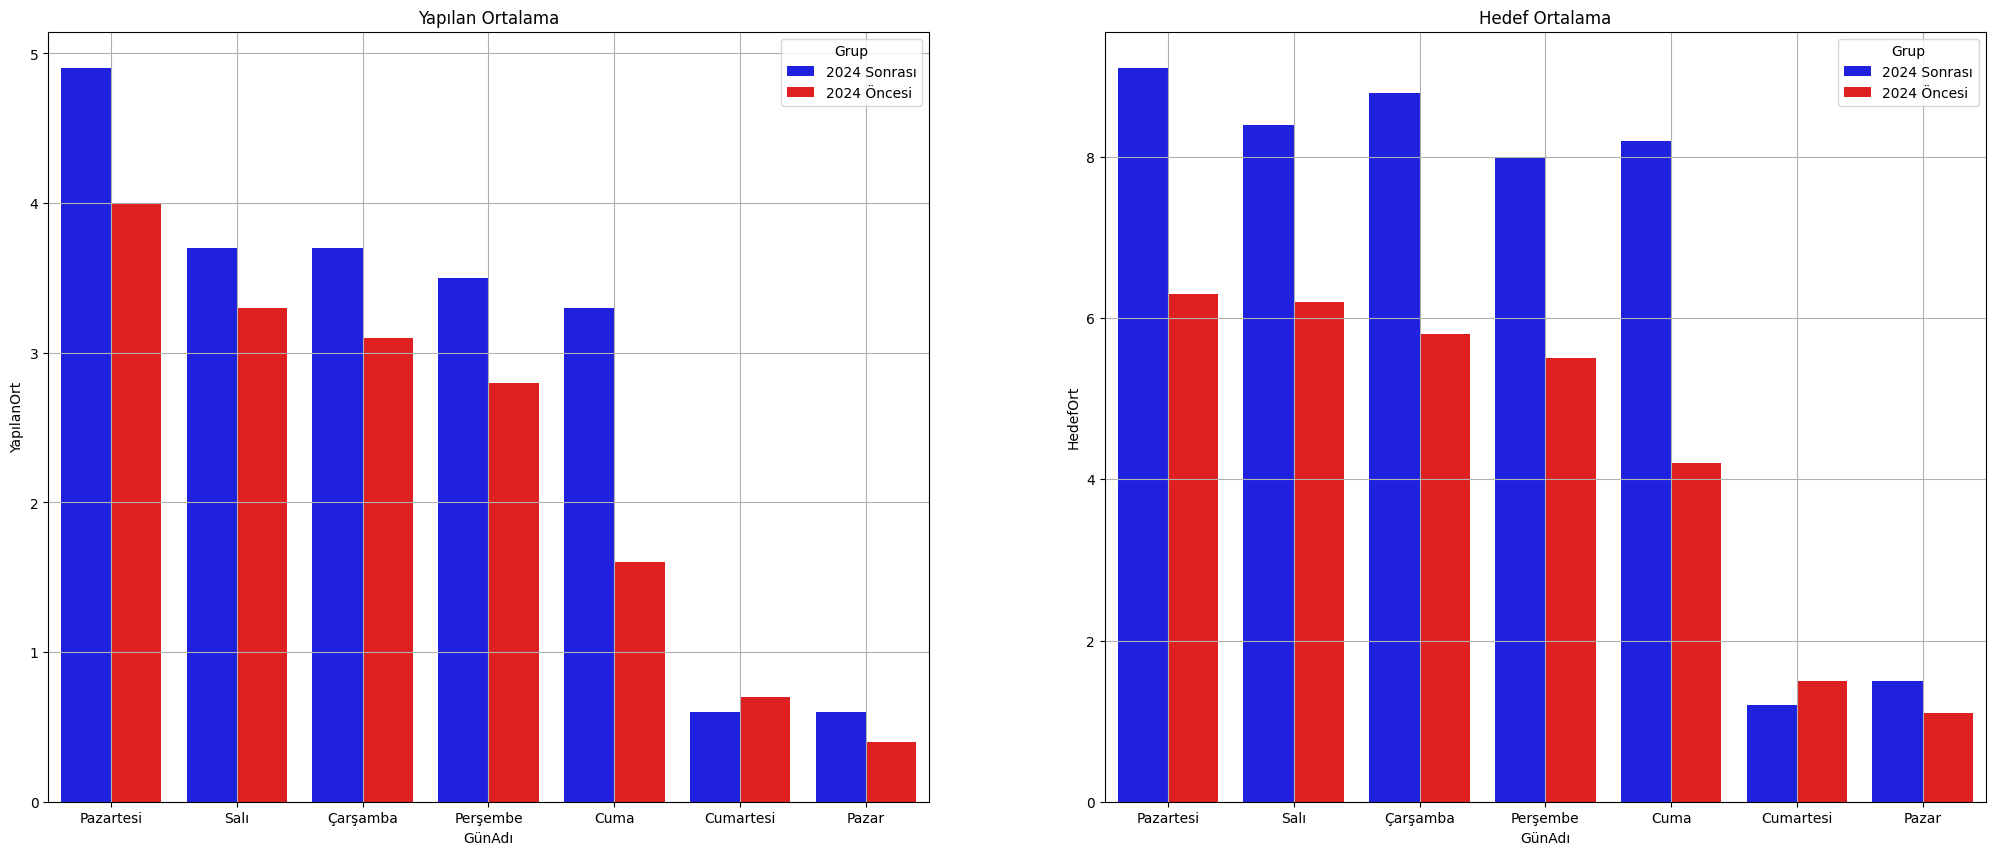

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(25,10))
plt.subplot(1,2,1)
calisma_2024_analiz['Grup'] = '2024 Sonrası'
calisma_2024_oncesi_analiz['Grup'] = '2024 Öncesi'
merged_df = pd.concat([calisma_2024_analiz, calisma_2024_oncesi_analiz])
sns.barplot(x='GünAdı', y='YapılanOrt', hue='Grup', data=merged_df, palette={'2024 Sonrası': 'blue', '2024 Öncesi': 'red'}).set(title='Yapılan Ortalama')
plt.grid()

plt.subplot(1,2,2)
calisma_2024_analiz['Grup'] = '2024 Sonrası'
calisma_2024_oncesi_analiz['Grup'] = '2024 Öncesi'
merged_df = pd.concat([calisma_2024_analiz, calisma_2024_oncesi_analiz])
sns.barplot(x='GünAdı', y='HedefOrt', hue='Grup', data=merged_df, palette={'2024 Sonrası': 'blue', '2024 Öncesi': 'red'}).set(title='Hedef Ortalama')

plt.grid()
plt.show()

[Text(0.5, 1.0, 'Çalışma Oranı %')]

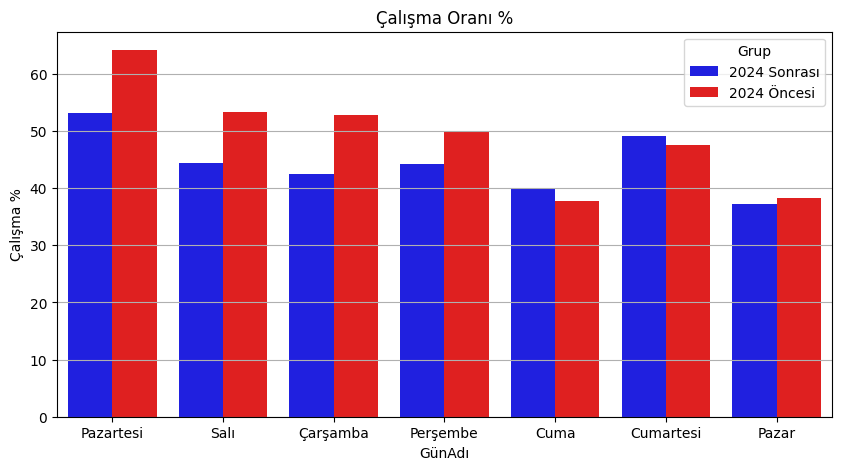

In [42]:
plt.figure(figsize=(10,5))
plt.grid()
sns.barplot(x='GünAdı', y='Çalışma %', hue='Grup', data=merged_df, palette={'2024 Sonrası': 'blue', '2024 Öncesi': 'red'}).set(title='Çalışma Oranı %')

<Axes: title={'center': 'Aylık Yapılan Çalışma'}, xlabel='Tarih', ylabel='Yapılan'>

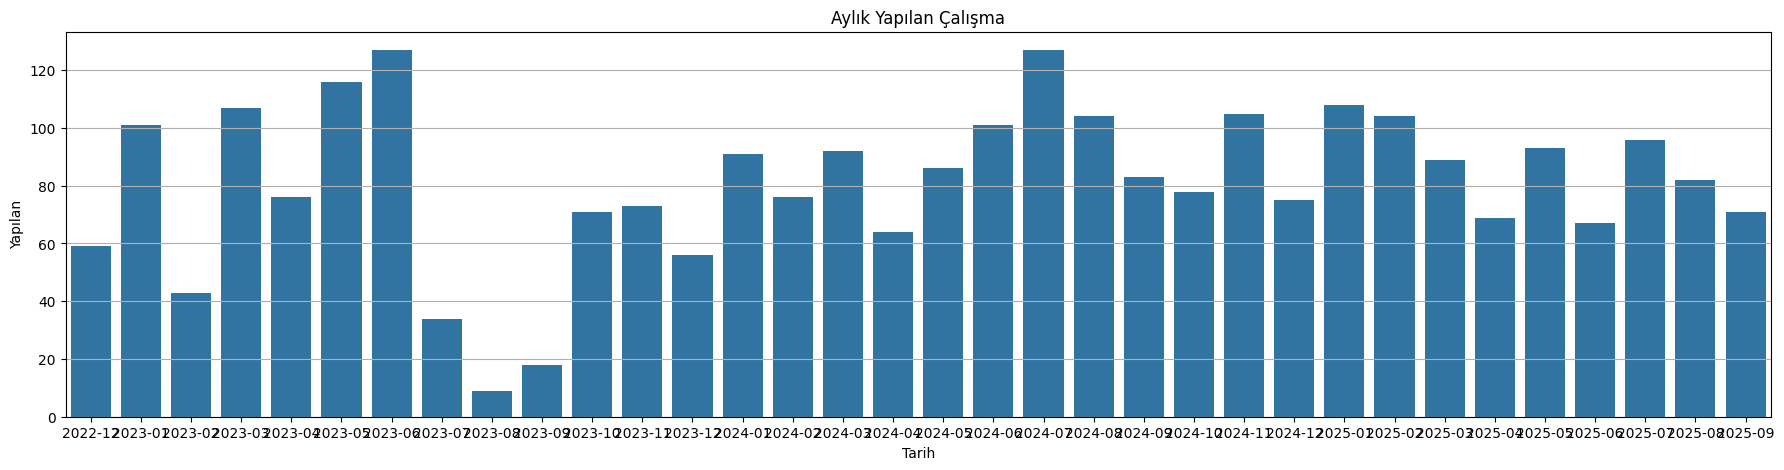

In [43]:
plt.figure(figsize=(22,5))
plt.title('Aylık Yapılan Çalışma')
plt.grid()
sns.barplot(x='Tarih', y='Yapılan', data=aylik_toplam)

<Axes: title={'center': 'Aylık Belirlenen Hedef'}, xlabel='Tarih', ylabel='Hedef'>

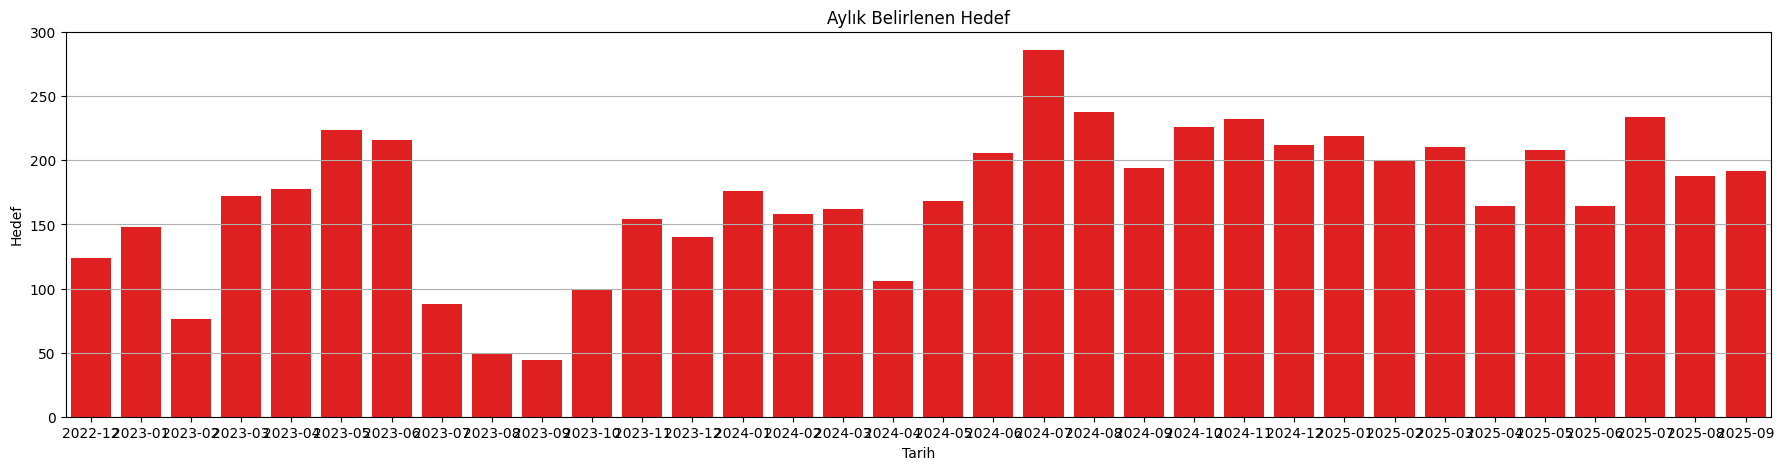

In [44]:
plt.figure(figsize=(22,5))
plt.title('Aylık Belirlenen Hedef')
plt.grid()
sns.barplot(x='Tarih', y='Hedef', data=aylik_toplam, color='red')

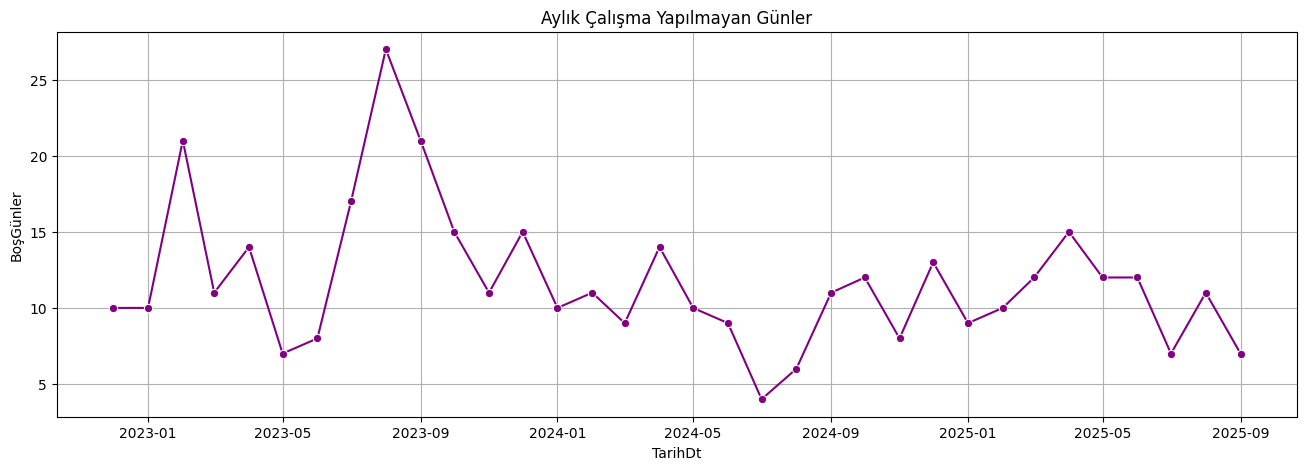

In [45]:
aylik_toplam['TarihDt'] = aylik_toplam['Tarih'].dt.to_timestamp() #Hata vermesini önlemek için böyle birşey yaptık.

plt.figure(figsize=(16,5))
plt.title('Aylık Çalışma Yapılmayan Günler')
plt.grid()
sns.lineplot(x='TarihDt', y='BoşGünler', data=aylik_toplam, color='purple', marker='o')
plt.show()

In [46]:
np.round(aylik_toplam['BoşGünler'].mean(),2)

11.74

In [47]:
aylik_toplam['Tarih'] = aylik_toplam['Tarih'].dt.to_timestamp()

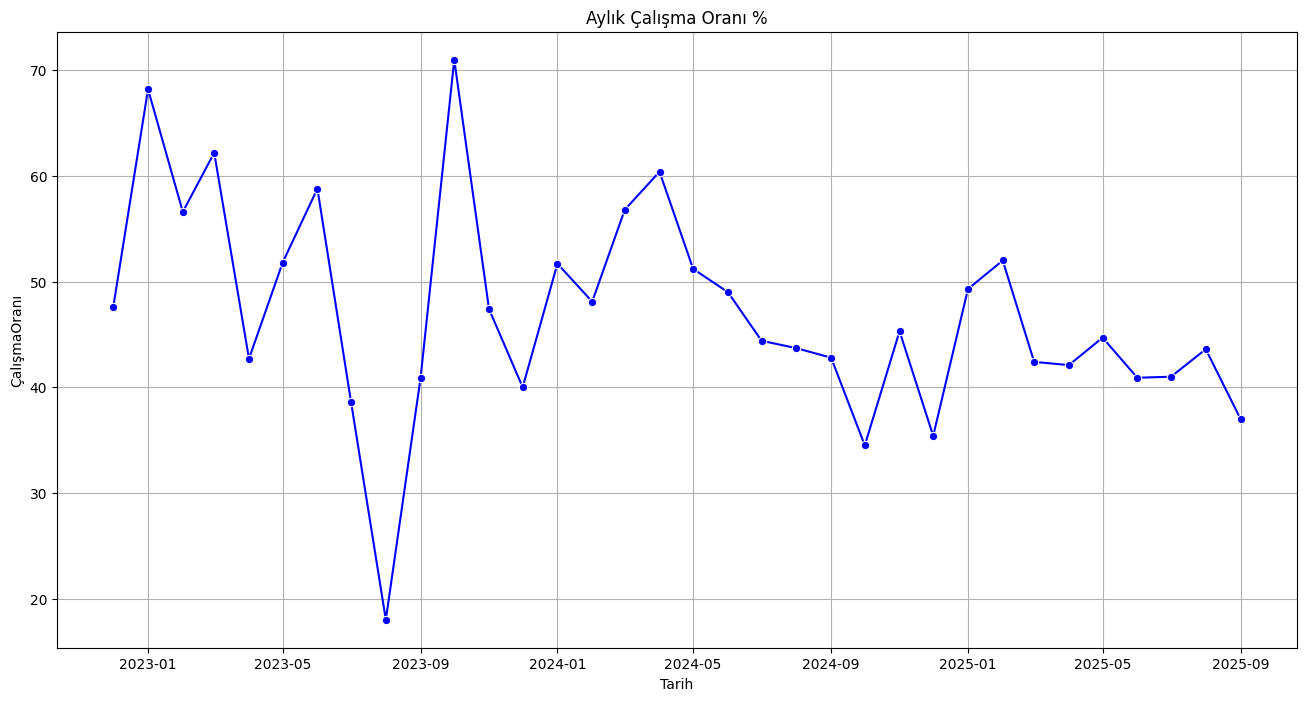

In [48]:

plt.figure(figsize=(16,8))
plt.title('Aylık Çalışma Oranı %')
plt.grid()
sns.lineplot(x='Tarih', y='ÇalışmaOranı', data=aylik_toplam, color='blue', marker='o')
plt.show()

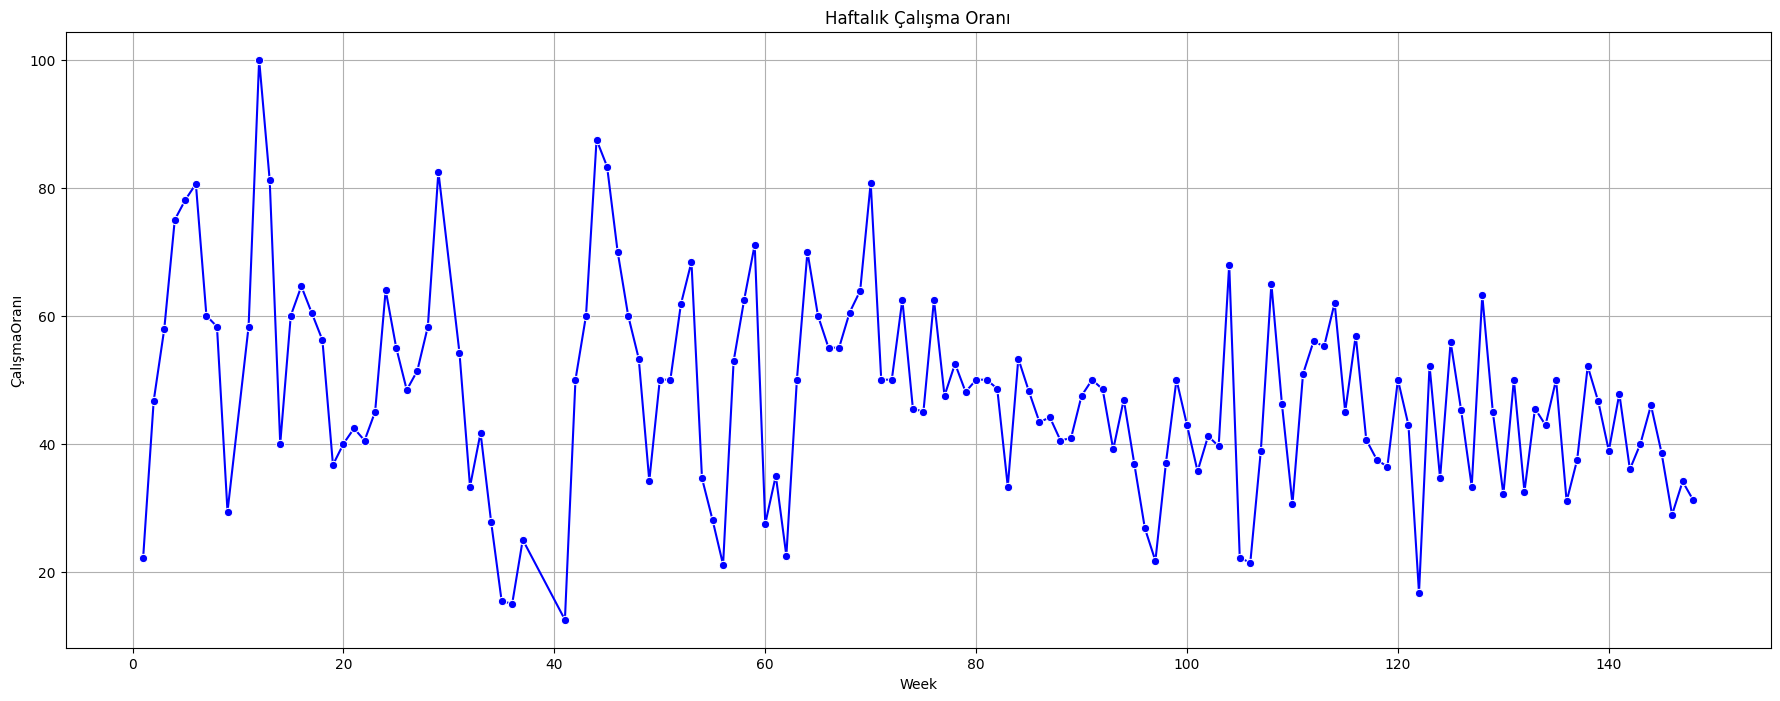

In [49]:
plt.figure(figsize=(22,8))
plt.title('Haftalık Çalışma Oranı')
plt.grid()
sns.lineplot(x='Week', y='ÇalışmaOranı', data=haftalik_toplam, color='blue', marker='o')
plt.show()

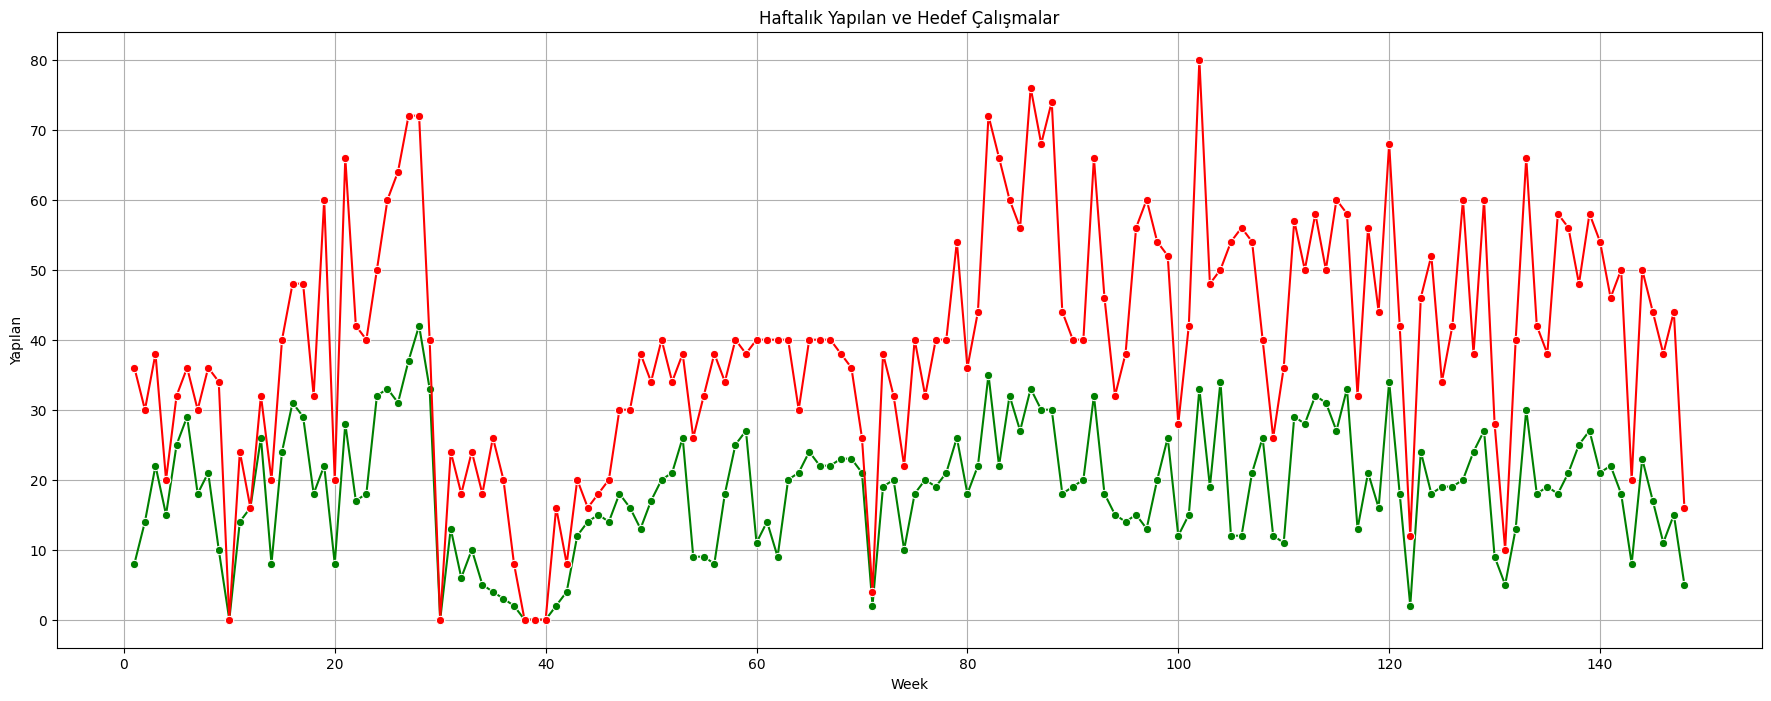

In [50]:
plt.figure(figsize=(22,8))
plt.title('Haftalık Yapılan ve Hedef Çalışmalar')
plt.grid()
sns.lineplot(x='Week', y='Yapılan', data=haftalik_toplam, color='Green', marker='o')
sns.lineplot(x='Week', y='Hedef', data=haftalik_toplam, color='Red', marker='o')
plt.show()

In [51]:
df_pzt = df[df['GünAdı']=='Pazartesi']
df_sali = df[df['GünAdı']=='Salı']
df_cars = df[df['GünAdı']=='Çarşamba']
df_pers = df[df['GünAdı']=='Perşembe']
df_cuma = df[df['GünAdı']=='Cuma']
df_sali.head()

,Tarih,GünAdı,Yapılan,Hedef,ÇalışmaOranı,FreeDay,OffDay,Yapilmayan,Week
1,2022-12-06,Salı,3,6,50.0,0,0,0,1
8,2022-12-13,Salı,2,6,33.3,0,0,0,2
15,2022-12-20,Salı,6,6,100.0,0,0,0,3
22,2022-12-27,Salı,4,4,100.0,0,0,0,4
29,2023-01-03,Salı,6,6,100.0,0,0,0,5


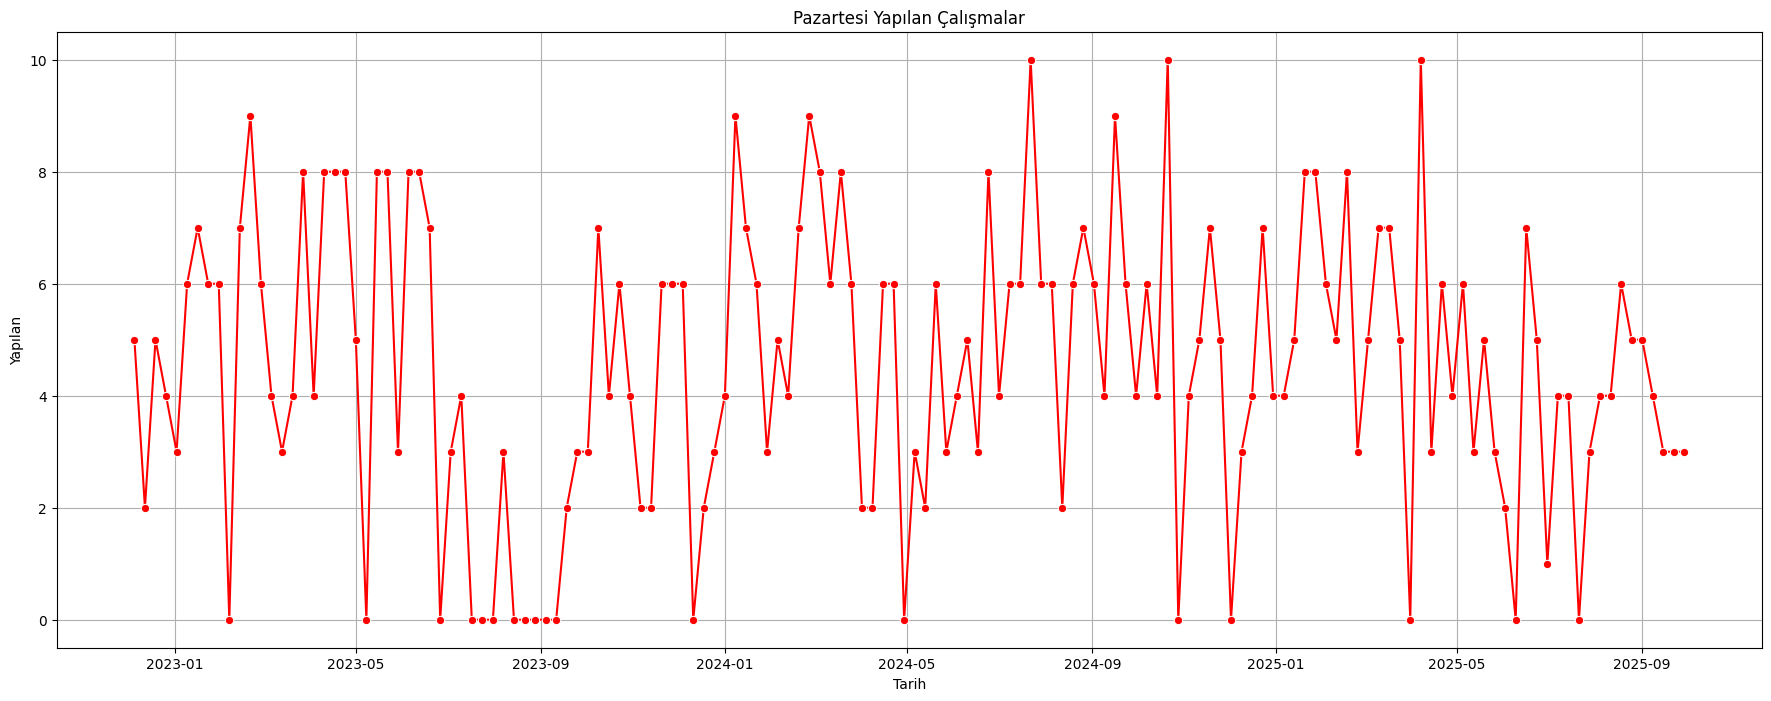

In [52]:
plt.figure(figsize=(22,8))
plt.title('Pazartesi Yapılan Çalışmalar')
plt.grid()
sns.lineplot(x='Tarih', y='Yapılan', data=df_pzt, color='Red', marker='o')
plt.show()

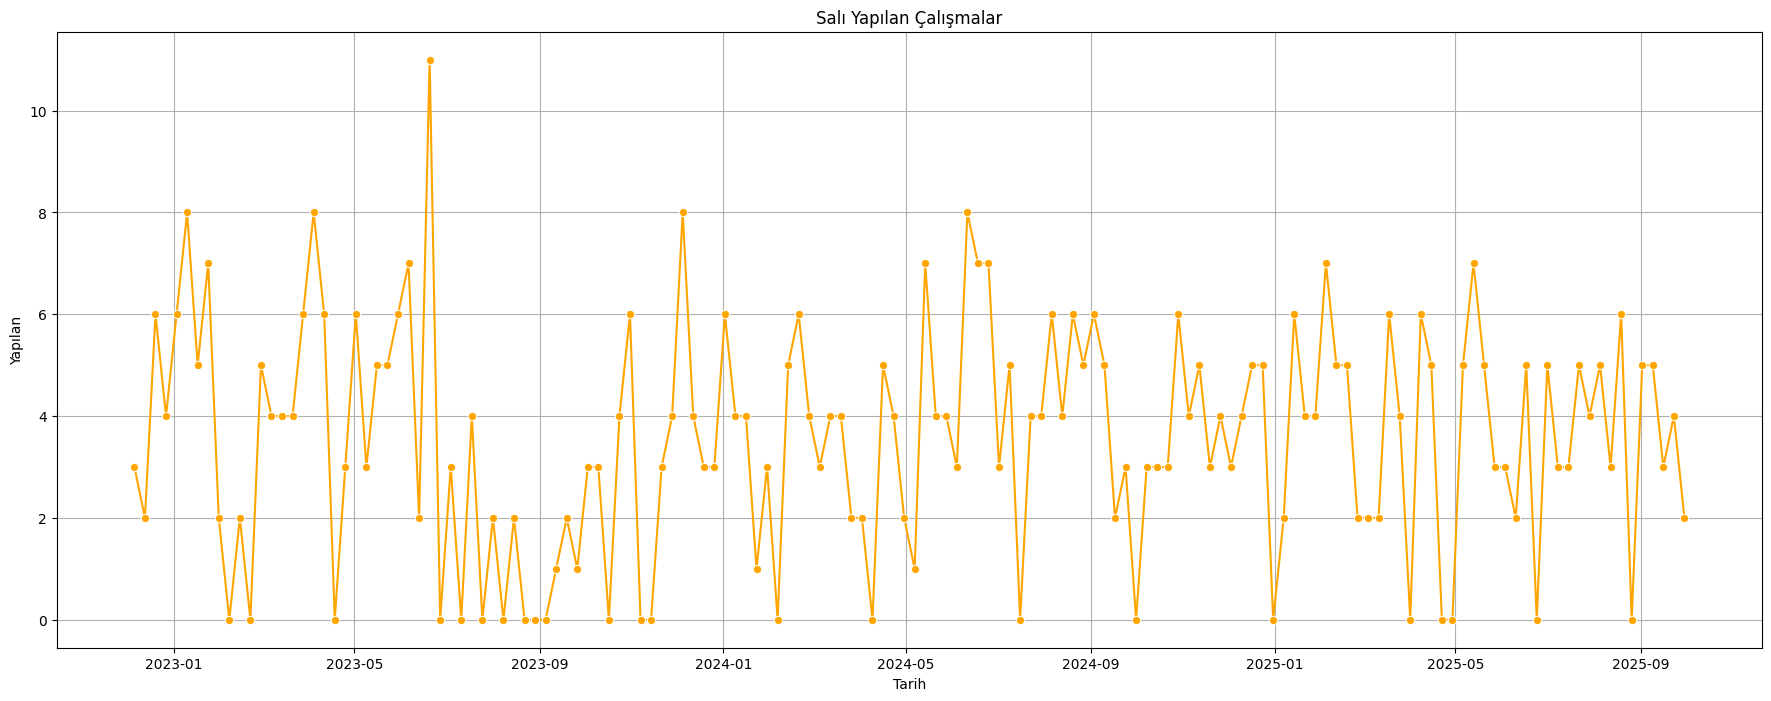

In [53]:
plt.figure(figsize=(22,8))
plt.title('Salı Yapılan Çalışmalar')
plt.grid()
sns.lineplot(x='Tarih', y='Yapılan', data=df_sali, color='Orange', marker='o')
plt.show()

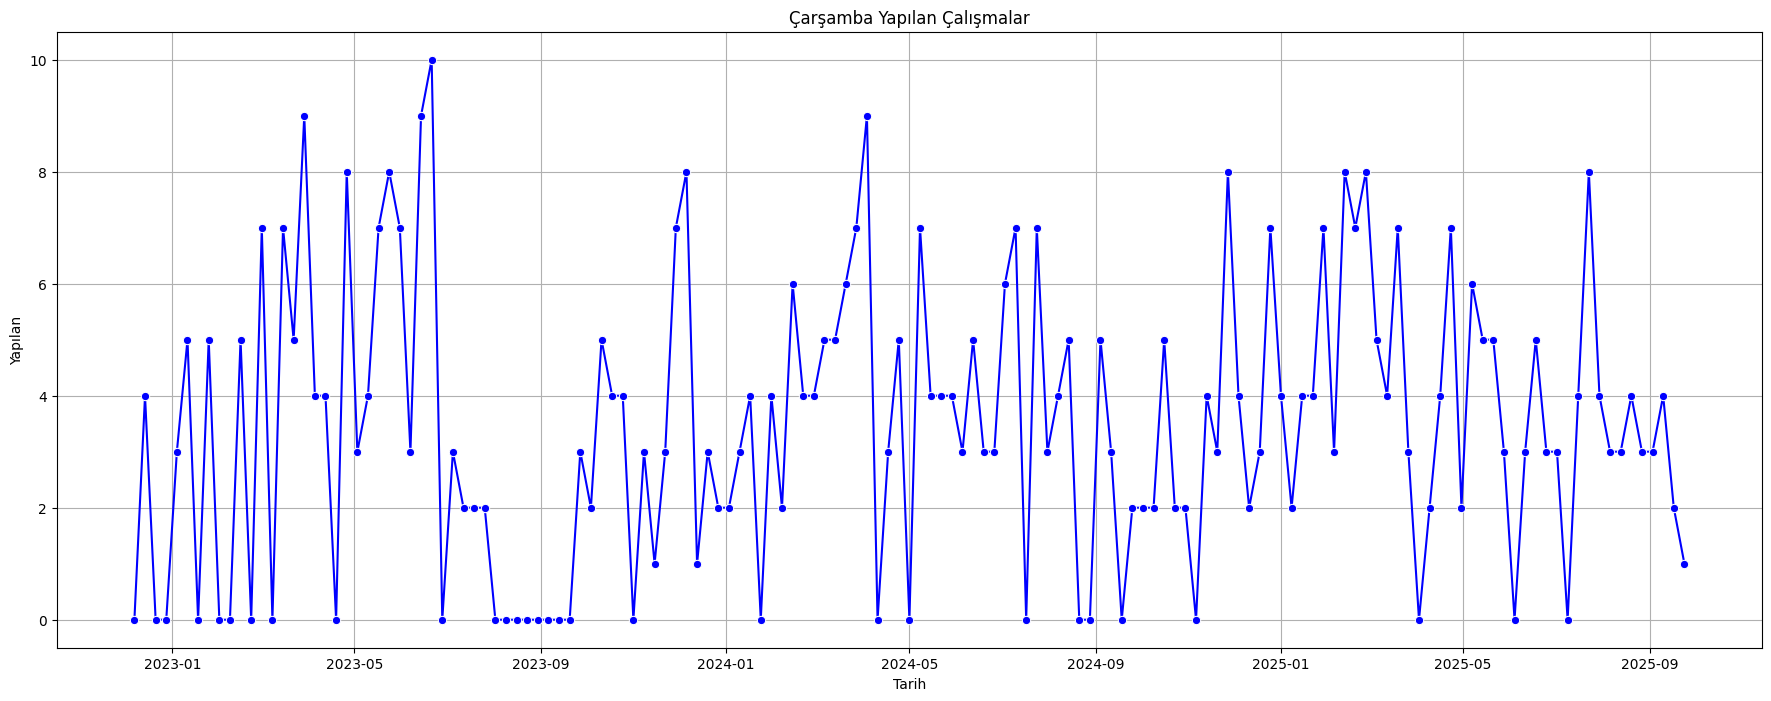

In [54]:
plt.figure(figsize=(22,8))
plt.title('Çarşamba Yapılan Çalışmalar')
plt.grid()
sns.lineplot(x='Tarih', y='Yapılan', data=df_cars, color='Blue', marker='o')
plt.show()

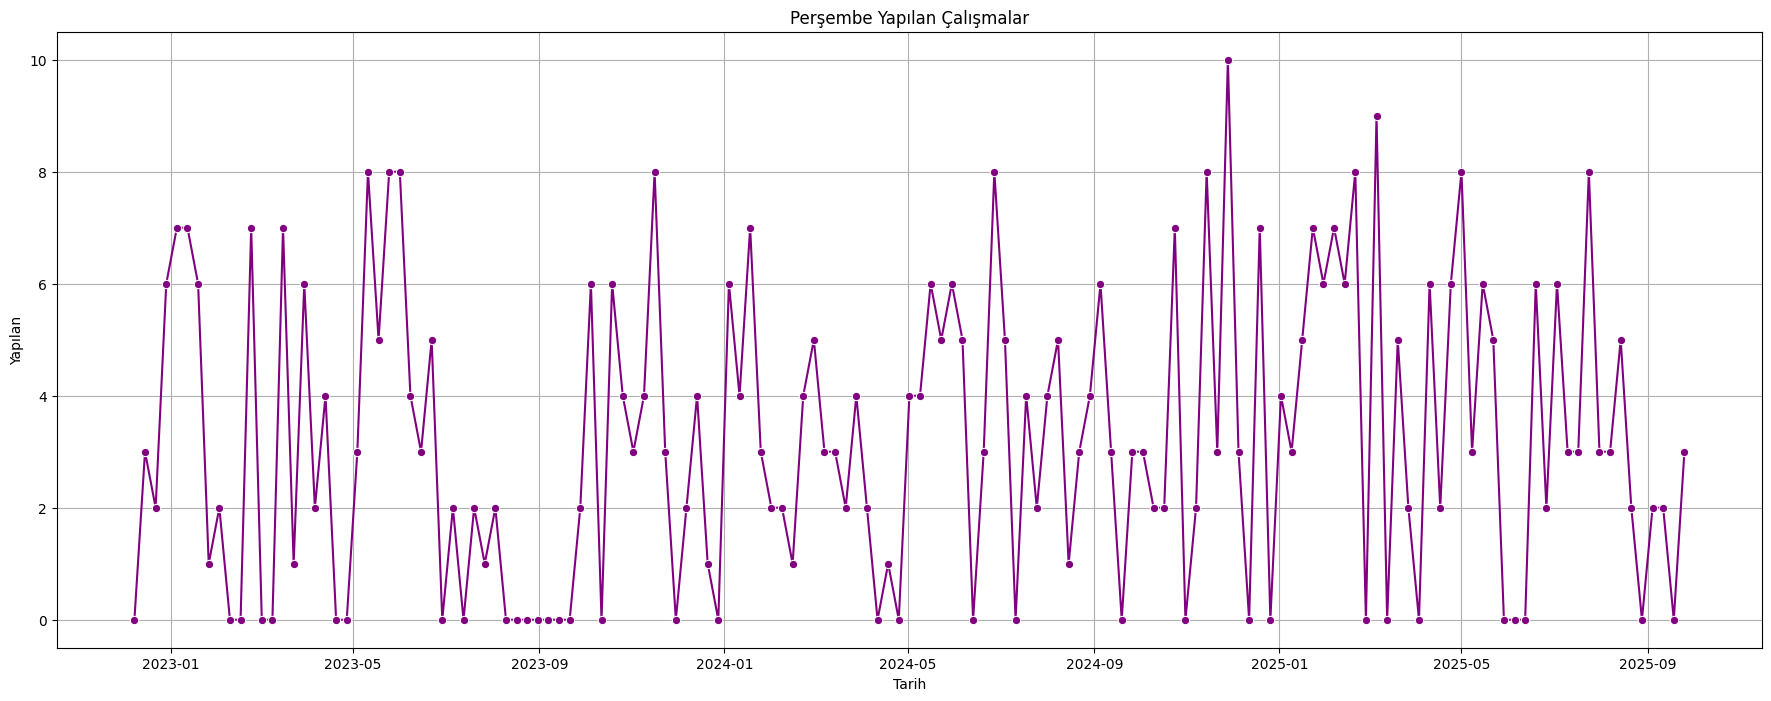

In [55]:
plt.figure(figsize=(22,8))
plt.title('Perşembe Yapılan Çalışmalar')
plt.grid()
sns.lineplot(x='Tarih', y='Yapılan', data=df_pers, color='Purple', marker='o')
plt.show()

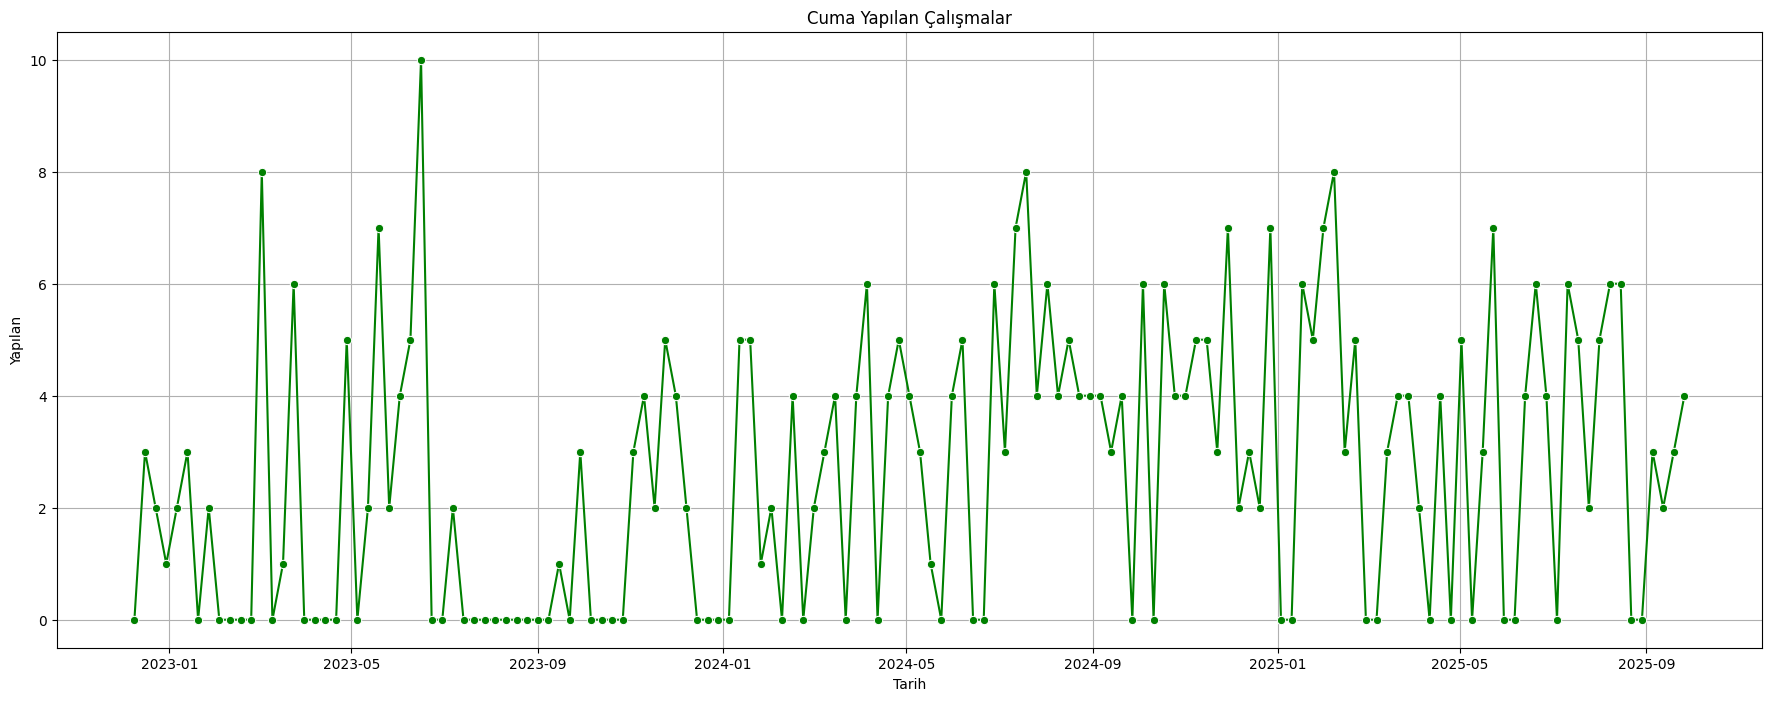

In [56]:
plt.figure(figsize=(22,8))
plt.title('Cuma Yapılan Çalışmalar')
plt.grid()
sns.lineplot(x='Tarih', y='Yapılan', data=df_cuma, color='Green', marker='o')
plt.show()

#### GRAFİĞE BAĞLI HAFTALIK ÇALIŞMALAR

In [57]:
print(f'30 ve üzeri haftalık yapılan çalışma yüzdesi % {np.round( (( haftalik_toplam[haftalik_toplam['Yapılan']>=30].shape[0] ) / ( haftalik_toplam.shape[0] )*100),1 ) }' )
print('30+ Yapılan Hafta Sayısı: ' , haftalik_toplam[haftalik_toplam['Yapılan']>=30].shape[0])
print('Toplam Hafta Sayısı: ' , haftalik_toplam.shape[0])
print('70+ Hedef Hafta Sayısı: ' , haftalik_toplam[haftalik_toplam['Hedef']>=70].shape[0])

30 ve üzeri haftalık yapılan çalışma yüzdesi % 13.5
30+ Yapılan Hafta Sayısı:  20
Toplam Hafta Sayısı:  148
70+ Hedef Hafta Sayısı:  6


In [58]:
haftalik_toplam[haftalik_toplam['Hedef']>=70]

,Yapılan,Hedef,ÇalışmaOranı,FreeDay,OffDay,Yapilmayan
Week,,,,,,
27,37,72,51.4,0,0,0
28,42,72,58.3,0,0,0
82,35,72,48.6,0,1,0
86,33,76,43.4,0,0,0
88,30,74,40.5,0,0,0
102,33,80,41.2,0,0,0


In [59]:
haftalik_toplam[haftalik_toplam['Yapılan']>=30]

,Yapılan,Hedef,ÇalışmaOranı,FreeDay,OffDay,Yapilmayan
Week,,,,,,
16,31,48,64.6,0,0,0
24,32,50,64.0,2,0,0
25,33,60,55.0,0,0,0
26,31,64,48.4,0,0,0
27,37,72,51.4,0,0,0
28,42,72,58.3,0,0,0
29,33,40,82.5,0,3,0
82,35,72,48.6,0,1,0
84,32,60,53.3,0,1,0


In [60]:
week_best = haftalik_toplam[haftalik_toplam['Yapılan']==haftalik_toplam['Yapılan'].max()]
week_best.reset_index(inplace=True)
week_best

,Week,Yapılan,Hedef,ÇalışmaOranı,FreeDay,OffDay,Yapilmayan
0,28,42,72,58.3,0,0,0


In [61]:
week_best['Week'][0]

28

In [62]:
df[df['Week']==(week_best['Week'][0])]

,Tarih,GünAdı,Yapılan,Hedef,ÇalışmaOranı,FreeDay,OffDay,Yapilmayan,Week
189,2023-06-12,Pazartesi,8,16,50.0,0,0,0,28
190,2023-06-13,Salı,2,4,50.0,0,0,0,28
191,2023-06-14,Çarşamba,9,8,112.5,0,0,0,28
192,2023-06-15,Perşembe,3,8,37.5,0,0,0,28
193,2023-06-16,Cuma,10,12,83.3,0,0,0,28
194,2023-06-17,Cumartesi,4,12,33.3,0,0,0,28
195,2023-06-18,Pazar,6,12,50.0,0,0,0,28


In [63]:
week_busy = haftalik_toplam[haftalik_toplam['Hedef']==haftalik_toplam['Hedef'].max()]
week_busy.reset_index(inplace=True)
week_busy

,Week,Yapılan,Hedef,ÇalışmaOranı,FreeDay,OffDay,Yapilmayan
0,102,33,80,41.2,0,0,0


In [64]:
df[df['Week']==(week_busy['Week'][0])]

,Tarih,GünAdı,Yapılan,Hedef,ÇalışmaOranı,FreeDay,OffDay,Yapilmayan,Week
707,2024-11-11,Pazartesi,5,12,41.7,0,0,0,102
708,2024-11-12,Salı,5,12,41.7,0,0,0,102
709,2024-11-13,Çarşamba,4,12,33.3,0,0,0,102
710,2024-11-14,Perşembe,8,12,66.7,0,0,0,102
711,2024-11-15,Cuma,5,8,62.5,0,0,0,102
712,2024-11-16,Cumartesi,2,12,16.7,0,0,0,102
713,2024-11-17,Pazar,4,12,33.3,0,0,0,102


In [65]:
haftalik_toplam[haftalik_toplam['ÇalışmaOranı']>=50]

,Yapılan,Hedef,ÇalışmaOranı,FreeDay,OffDay,Yapilmayan
Week,,,,,,
3,22,38,57.9,0,0,1
4,15,20,75.0,0,2,1
5,25,32,78.1,1,0,0
6,29,36,80.6,2,0,0
7,18,30,60.0,2,1,1
...,...,...,...,...,...,...
125,19,34,55.9,2,2,0
128,24,38,63.2,2,0,0
131,5,10,50.0,3,2,0
